# 支持向量机SVM（Support Vector Machine）

## 【关键词】支持向量，最大几何间隔，拉格朗日乘子法

## 一、支持向量机的原理

Support Vector Machine。支持向量机，其含义是通过支持向量运算的分类器。其中“机”的意思是机器，可以理解为分类器。
那么什么是支持向量呢？在求解的过程中，会发现只根据部分数据就可以确定分类器，这些数据称为支持向量。
见下图，在一个二维环境中，其中点R，S，G点和其它靠近中间黑线的点可以看作为支持向量，它们可以决定分类器，也就是黑线的具体参数。

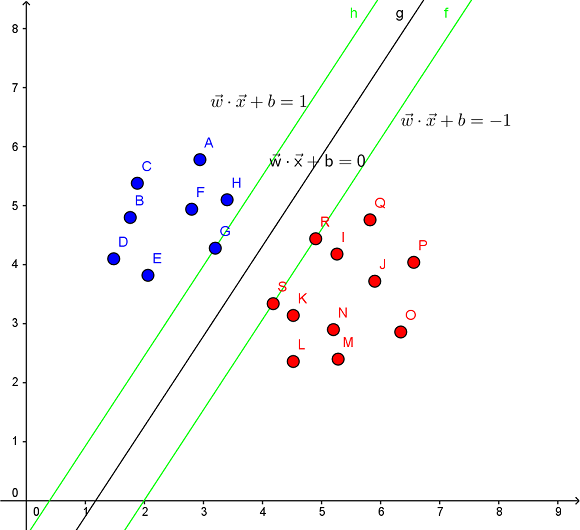

解决的问题：

- 线性分类

在训练数据中，每个数据都有n个的属性和一个二类类别标志，我们可以认为这些数据在一个n维空间里。我们的目标是找到一个n-1维的超平面（hyperplane），这个超平面可以将数据分成两部分，每部分数据都属于同一个类别。
其实这样的超平面有很多，我们要找到一个最佳的。因此，增加一个约束条件：这个超平面到每边最近数据点的距离是最大的。也成为最大间隔超平面（maximum-margin hyperplane）。这个分类器也成为最大间隔分类器（maximum-margin classifier）。
支持向量机是一个二类分类器。

- 非线性分类

SVM的一个优势是支持非线性分类。它结合使用拉格朗日乘子法和KKT条件，以及核函数可以产生非线性分类器。

SVM的目的是要找到一个线性分类的最佳超平面 f(x)=xw+b=0。求 w 和 b。

首先通过两个分类的最近点，找到f(x)的约束条件。

有了约束条件，就可以通过拉格朗日乘子法和KKT条件来求解，这时，问题变成了求拉格朗日乘子αi 和 b。

对于异常点的情况，加入松弛变量ξ来处理。

非线性分类的问题：映射到高维度、使用核函数。

#### 线性分类及其约束条件

SVM的解决问题的思路是找到离超平面的最近点，通过其约束条件求出最优解。

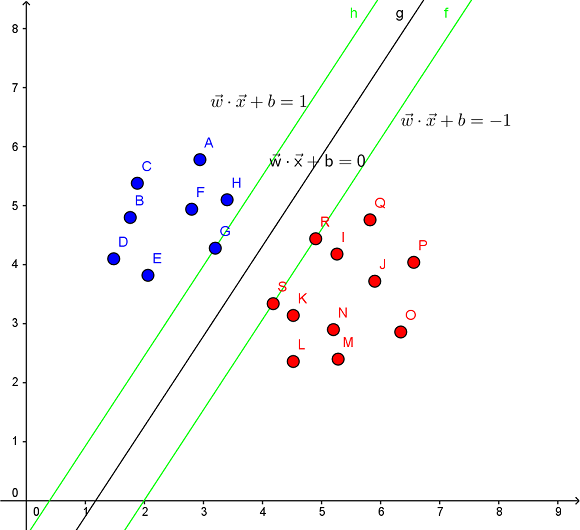

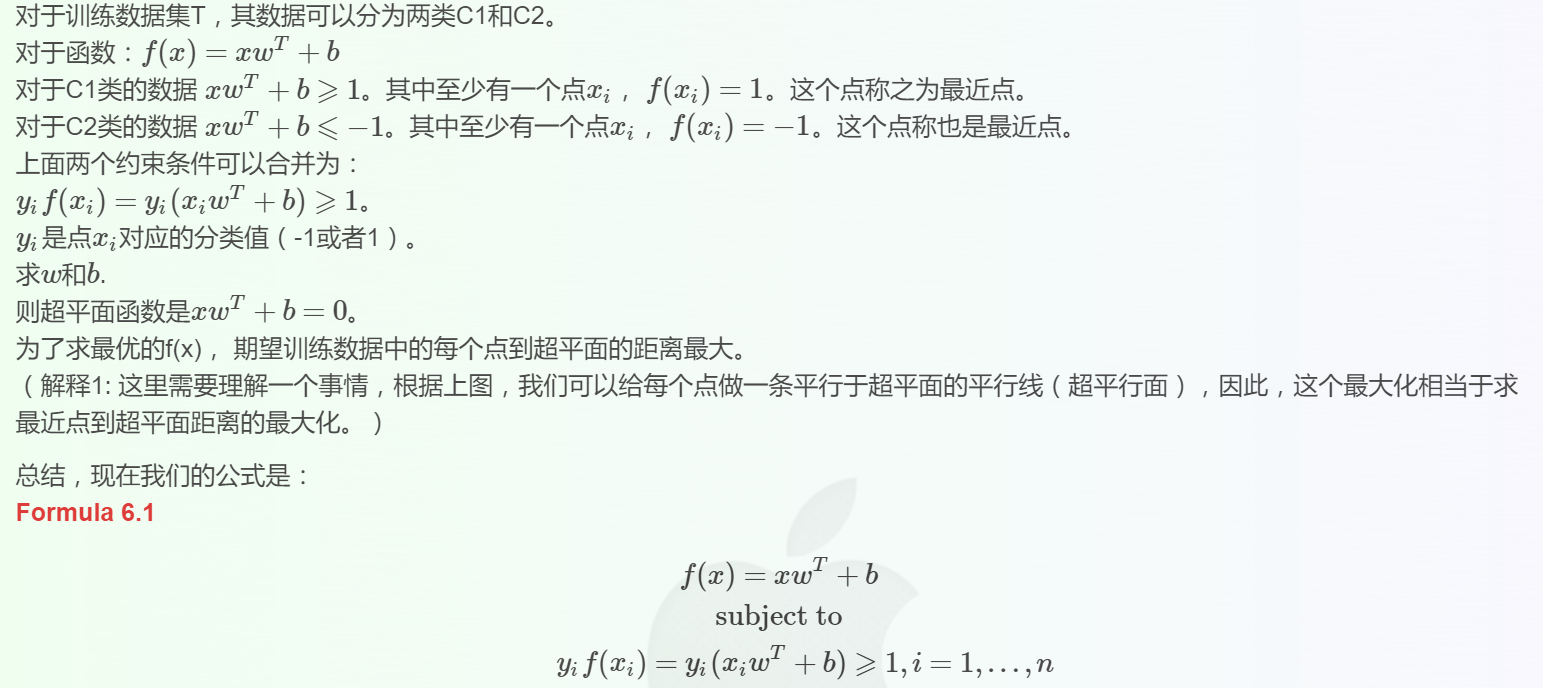

#### 最大几何间隔（geometrical margin）

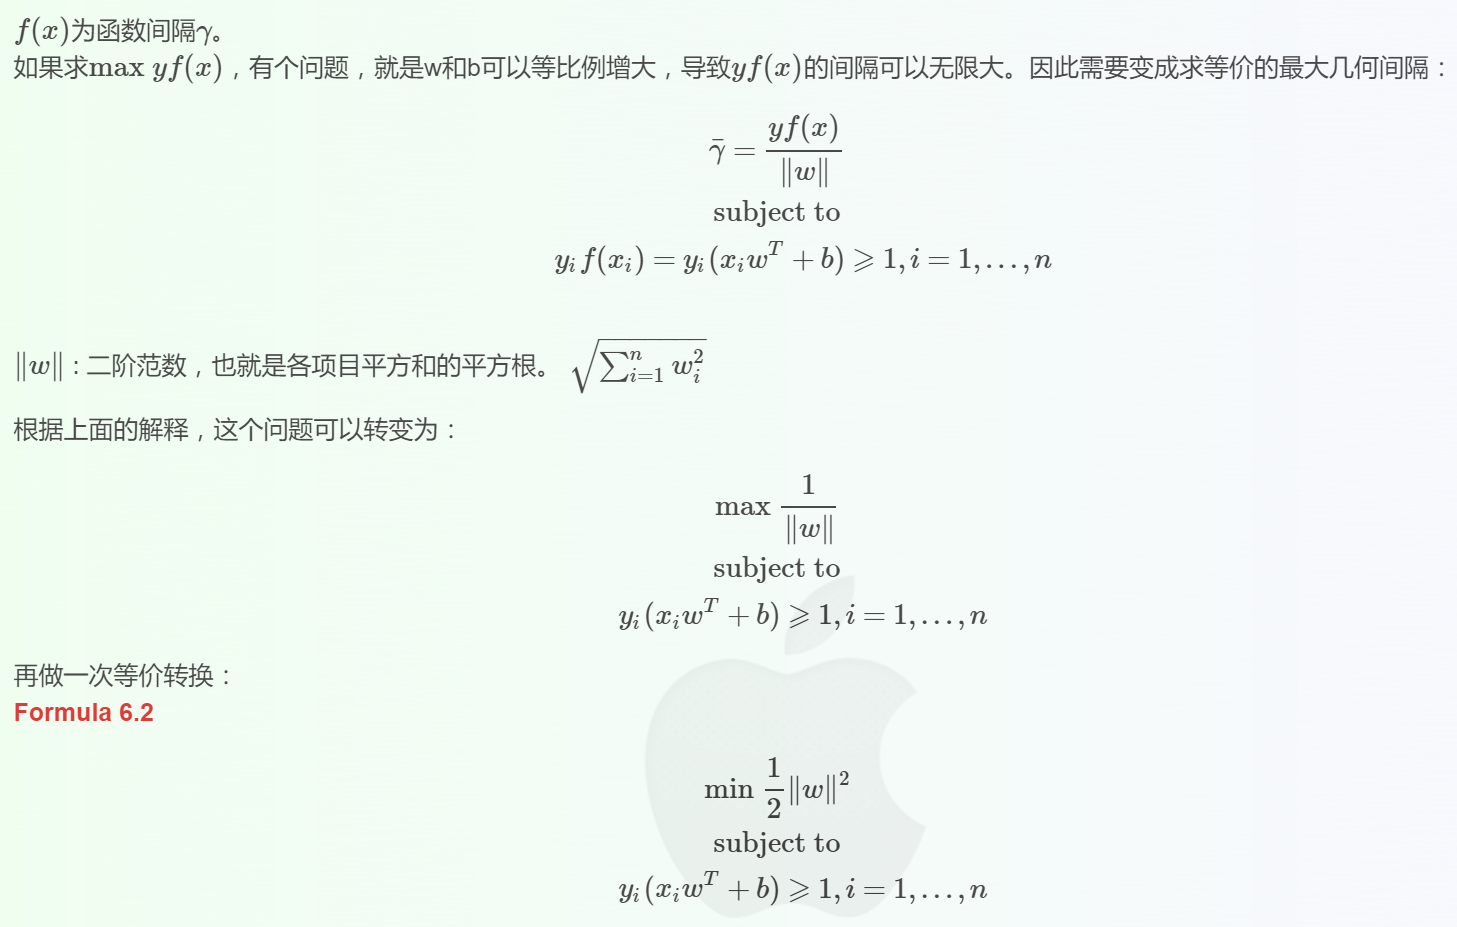

#### 求解问题w,b

我们使用拉格朗日乘子法(http://blog.csdn.net/on2way/article/details/47729419)
来求w和b，一个重要原因是使用拉格朗日乘子法后,还可以解决非线性划分问题。
拉格朗日乘子法可以解决下面这个问题：

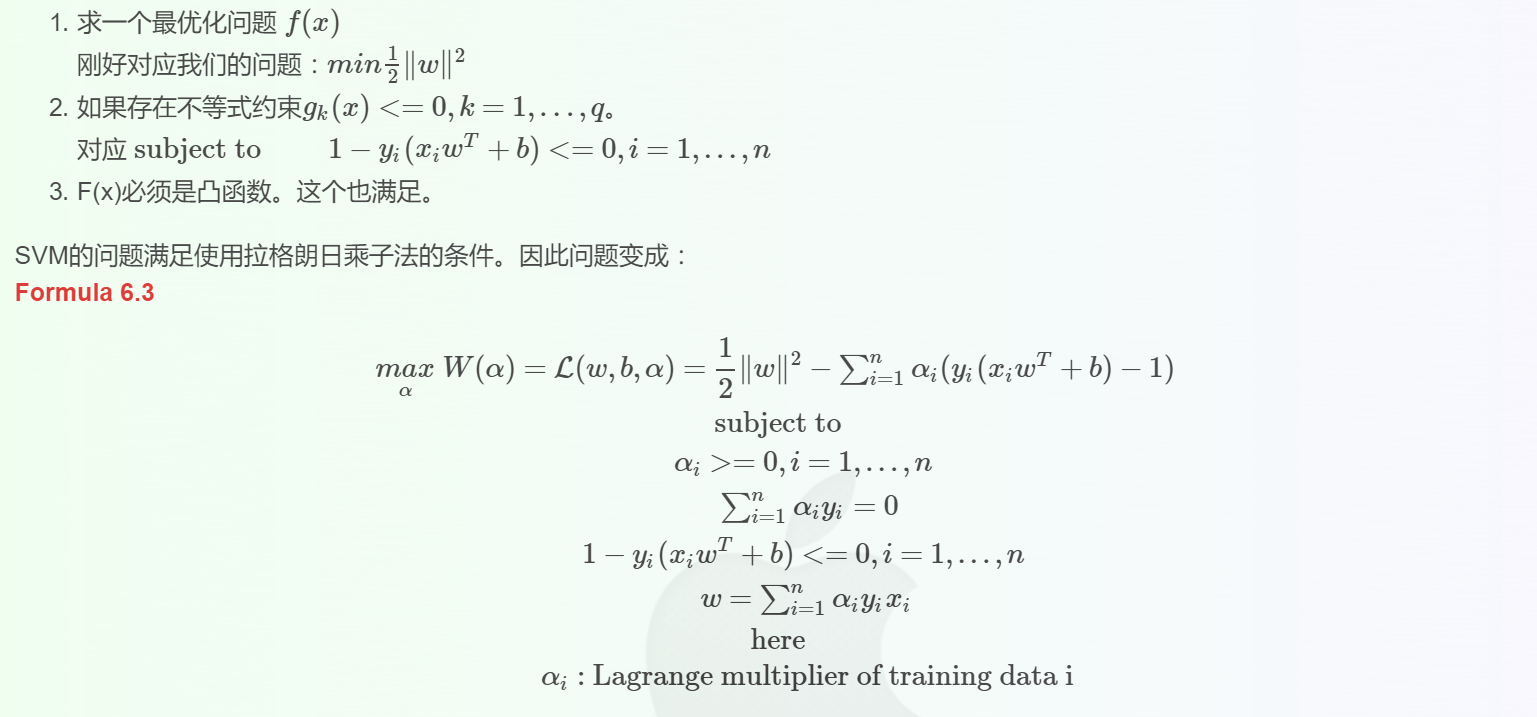

消除w之后变为：

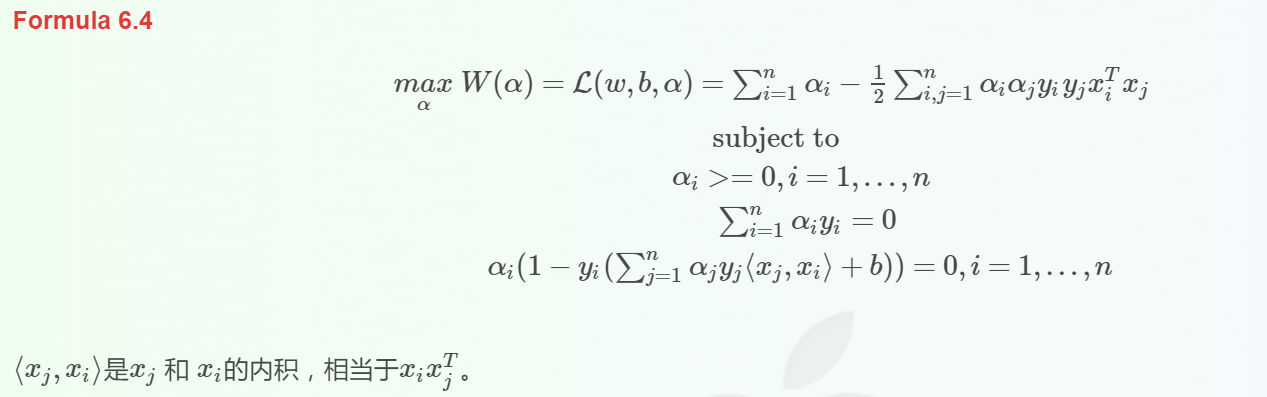

可见使用拉格朗日乘子法后，求w,b的问题变成了求拉格朗日乘子αi和b的问题。
到后面更有趣，变成了不求w了，因为αi可以直接使用到分类器中去，并且可以使用αi支持非线性的情况.

## 二、实战

### 1、画出决策边界

导包sklearn.svm

In [5]:
# SVC是支持向量机的分类算法
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

随机生成数据，并且进行训练

In [17]:
np.random.seed(1)
samples1 = np.random.randn(20,2) + [[-2,3]]
samples2 = np.random.randn(20,2) + [[2,-1]]

samples = np.concatenate((samples1,samples2))
target = [0]*20 + [1]*20

In [ ]:
# linear  线性可分的情况使用
# rbf     线性不可分
# poly    以上两种效果都不好，再使用，耗时非常长

In [19]:
svc = SVC(kernel='linear')

svc.fit(samples,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

##### 超平面的公式 
f(x) = w*x + k

提取系数获取斜率

In [22]:
svc.coef_[0,0]

1.0699901013441295

In [23]:
w = -svc.coef_[0,0]/svc.coef_[0,1]
w

3.153964300544549

In [26]:
k = svc.intercept_[0]
k

-0.10546966745706991

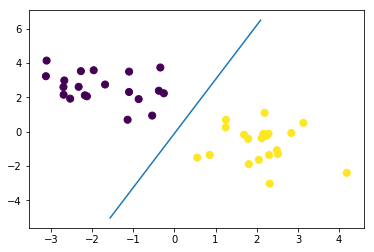

In [31]:
xmin,xmax = samples[:,0].min()/2,samples[:,0].max()/2

x = np.linspace(xmin,xmax,100)
y = w*x + k

plt.plot(x,y)
plt.scatter(samples[:,0],samples[:,1],s=50,c=target)

In [33]:
up_vector = svc.support_vectors_[0]
bottom_vector = svc.support_vectors_[-1]

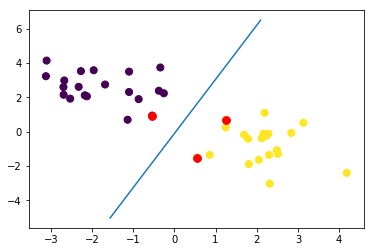

In [37]:
plt.plot(x,y)
plt.scatter(samples[:,0],samples[:,1],s=50,c=target)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],color='red',s=60)

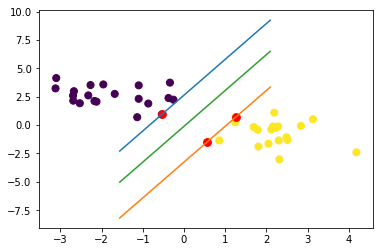

In [40]:
# y = w*x + k
k1 = up_vector[1] - w*up_vector[0]
k2 = bottom_vector[1] - w*bottom_vector[0]

y1 = w*x + k1
y2 = w*x + k2
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y)
plt.scatter(samples[:,0],samples[:,1],s=50,c=target)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],color='red',s=60)

线性方程的截距

f(x) = ax + b，期中b就是函数f(x)截距,即函数线与y轴的交点的值

- 函数的截距可以使用svc.intercept_方法得到

确定一个x轴的区间，取x_train中的最大值和最小值为边界，计算y值，y = 斜率*x + 截距

绘制出分割线

使用svc.support_vectors_找出支持向量，即离分割线最近的点集合，绘制出支持向量的所有点

绘制两条线，分别经过支持向量的第一个点和最后一个点，即查看分割线两边的通过支持向量的平行线

绘制图形

### 2、使用多种核函数对iris数据集进行分类

导包

In [42]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

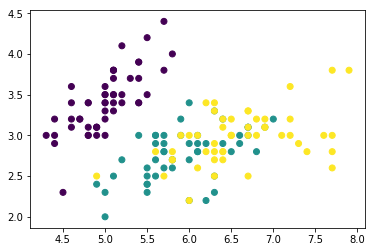

In [44]:
iris = load_iris()
data = iris.data
target = iris.target
samples = data[:,:2]
plt.scatter(samples[:,0],samples[:,1],c=target)

In [51]:
samples.shape

(150, 2)

In [45]:
linear = SVC(kernel='linear')
rbf = SVC(kernel='rbf')
poly = SVC(kernel='poly')

In [46]:
%time linear.fit(samples,target)

Wall time: 984 µs


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
%time rbf.fit(samples,target)

Wall time: 2 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
%time poly.fit(samples,target)

Wall time: 15 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# 时间：linear最省时，其次是rbf，最慢的是poly内核，甚用

提取数据只提取两个特征，方便画图  
创建支持向量机的模型：'linear', 'poly'(多项式), 'rbf'(Radial Basis Function:基于半径函数),

In [49]:
xmin,xmax = samples[:,0].min()-0.5,samples[:,0].max()+0.5
ymin,ymax = samples[:,1].min()-0.5,samples[:,1].max()+0.5

x = np.linspace(xmin,xmax,300)
y = np.linspace(ymin,ymax,300)

xx,yy = np.meshgrid(x,y)
X_test = np.c_[xx.ravel(),yy.ravel()]

In [52]:
X_test.shape

(90000, 2)

训练模型

In [50]:
# 预测时间比训练时间短，SVM先求出支持向量，然后再根据支持向量对比预测点的位置
%time y1_ = linear.predict(X_test)

Wall time: 114 ms


In [57]:
%time y2_ = rbf.predict(X_test)

Wall time: 207 ms


In [61]:
%time y3_ = poly.predict(X_test)

Wall time: 117 ms


图片背景点

In [62]:
from matplotlib.colors import ListedColormap
colormap = ListedColormap(['#00aaff','#aa00ff','#ffaa00'])

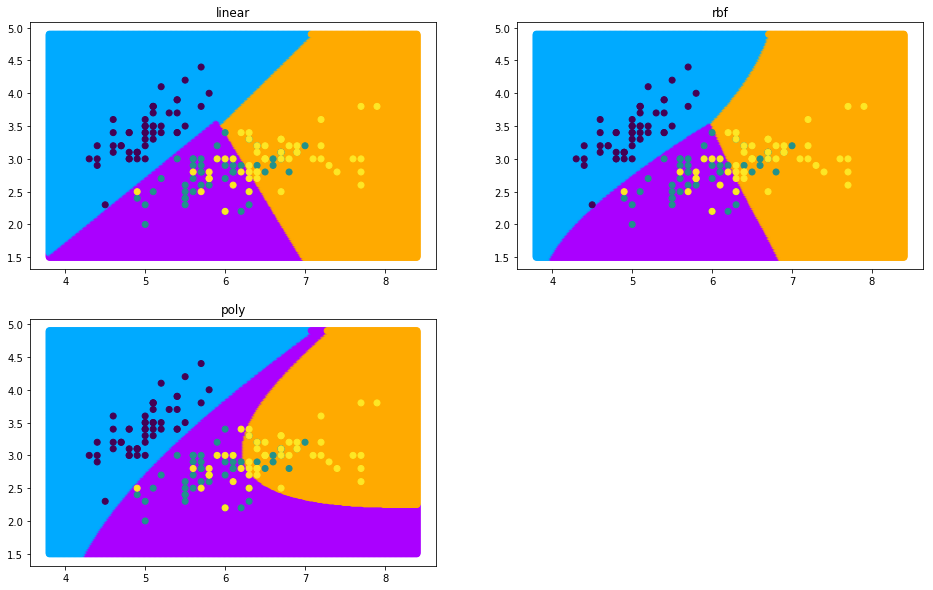

In [63]:
results = [y1_,y2_,y3_]
labels = ['linear','rbf','poly']

plt.figure(figsize=(16,10))
for i in range(3):
    axes = plt.subplot(2,2,i+1)
    y_ = results[i]
    axes.scatter(X_test[:,0],X_test[:,1],c=y_,cmap=colormap)
    axes.scatter(samples[:,0],samples[:,1],c=target)
    axes.set_title(labels[i])

In [64]:
# linear 类似于 Logistic回归
# rbf  类似于 GaussianNB

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

logistic = LogisticRegression()
gaussion = GaussianNB()

In [68]:
%timeit logistic.fit(samples,target)

637 µs ± 40.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [69]:
%timeit gaussion.fit(samples,target)

577 µs ± 74.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [70]:
%timeit linear.fit(samples,target)

521 µs ± 5.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [71]:
%timeit rbf.fit(samples,target)

740 µs ± 55.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


预测并绘制图形for循环绘制图形

### 3、使用SVM多种核函数进行回归

导包

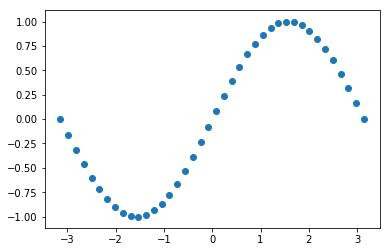

In [75]:
x = np.linspace(-np.pi,np.pi,40)
y = np.sin(x)
plt.scatter(x,y)

In [83]:
noise = np.random.random(10) - 0.5
noise

array([-0.47280512, -0.49158098, -0.15740622, -0.20815824,  0.05157893,
       -0.15727586,  0.30148395, -0.15495128, -0.49880787,  0.00377052])

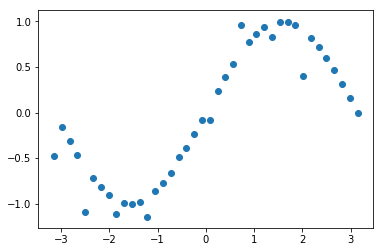

In [84]:
y[::4] += noise
plt.scatter(x,y)

In [86]:
from sklearn.svm import SVR

linear = SVR(kernel='linear')
rbf = SVR(kernel='rbf')
poly = SVR(kernel='poly')

In [88]:
x = x.reshape(-1,1)
linear.fit(x,y)
rbf.fit(x,y)
poly.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [92]:
X_test = np.linspace(x.min(),x.max(),100).reshape(-1,1)
y1_ = linear.predict(X_test)
y2_ = rbf.predict(X_test)
y3_ = poly.predict(X_test)

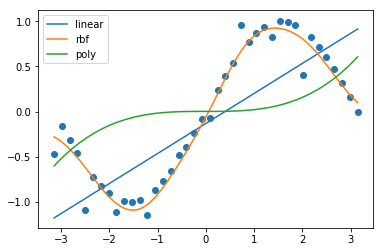

In [95]:
plt.scatter(x,y)
plt.plot(X_test,y1_,label='linear')
plt.plot(X_test,y2_,label='rbf')
plt.plot(X_test,y3_,label='poly')
plt.legend()

自定义样本点rand，并且生成sin函数曲线

数据加噪

建立模型，训练数据，并预测数据，预测训练数据就行

绘制图形，观察三种支持向量机内核不同

## 三、作业

### 1、使用不同核对下面三个数据集进行分类，并画出分类边界

- ex6data1.mat
- ex6data2.mat
- ex6data3.mat


### 2、使用SVC对cars.txt进行分析

In [ ]:
# 1 获取数据集（样本集）
# 2 特征处理（特征工程理论指导）
# 3 数据清洗（异常值...）
# 4 模型选择（算法）
# 5 算法评价 (r2_score回归模型  score分类模型)
# 6 绘图展示（结果说明）

In [98]:
cars = pd.read_csv('../data/cars.txt',header=None)

In [114]:
samples = cars.iloc[:,:6].copy()
target = cars[6]

In [106]:
samples[0].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [108]:
samples[1].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [109]:
samples[2].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [110]:
samples[3].unique()

array(['2', '4', 'more'], dtype=object)

In [111]:
samples[4].unique()

array(['small', 'med', 'big'], dtype=object)

In [112]:
samples[5].unique()

array(['low', 'med', 'high'], dtype=object)

In [113]:
map_dic = {
    'vhigh':0, 'high':1, 'med':2, 'low':3,
    '2':0, '3':1, '4':2, '5more':3,
    'more':1,
    'small':1, 'big':3,  
}

In [116]:
samples.replace(map_dic,inplace=True)

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(samples,target,test_size=0.2,random_state=2)

In [123]:
from sklearn.svm import SVC

linear = SVC(kernel='linear')
print("svm liner score is %f"%linear.fit(X_train,y_train).score(X_test,y_test))

rbf = SVC(kernel='rbf')
print("rbf liner score is %f"%rbf.fit(X_train,y_train).score(X_test,y_test))

poly = SVC(kernel='poly')
print("poly liner score is %f"%poly.fit(X_train,y_train).score(X_test,y_test))

svm liner score is 0.843931
rbf liner score is 0.982659
poly liner score is 0.950867


In [124]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train).score(X_test,y_test)

0.7832369942196532